In [7]:
import pandas
import matplotlib.pyplot as plt
# import matplotlib
import pathlib
import numpy as np
import re
from math import sinh, sqrt, exp

cwd = pathlib.Path.cwd()

Problem 1

$$ T_o(t) = A + B sin(\frac{2 \pi t}{\tau}) $$

$$ \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2} $$

$$ \frac{d T}{dt} = \frac{D}{a^2}[T(x + a, t) + T(x - a, t) - 2T(x,t)]

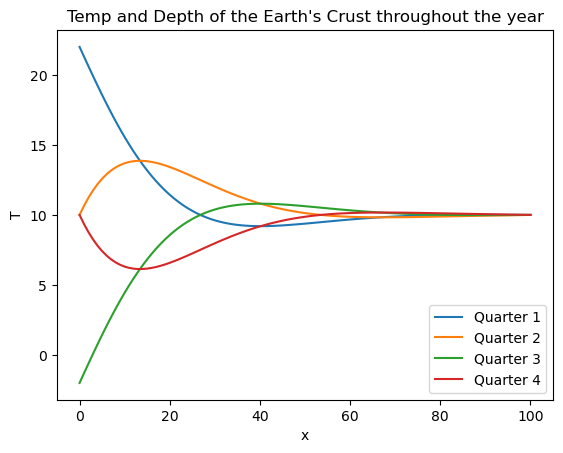

In [20]:
cpp_data = pandas.read_csv(str(cwd / "Problem1Data.csv"), header = 0)
x_data = cpp_data.loc[:, "n"]
cpp_data = cpp_data.set_index("n")
# print(cpp_data)


for col in cpp_data:
    name = re.split("_", col)[1]
    name = f"Quarter {name}"
    plt.plot(x_data, cpp_data.loc[:, col], label = name)
plt.title("Temp and Depth of the Earth's Crust throughout the year")
plt.xlabel("x")
plt.ylabel("T")
plt.legend(loc = "lower right")
plt.show()

Problem 2

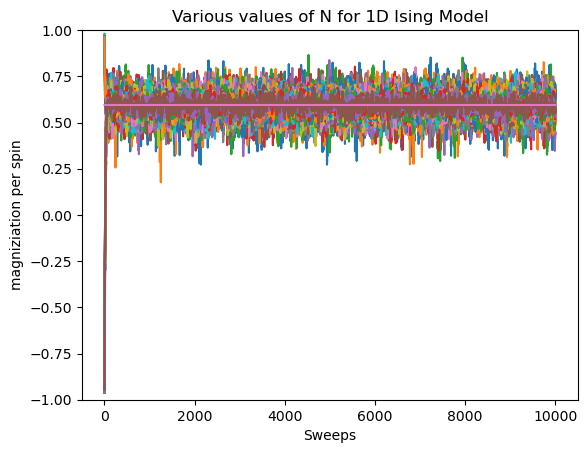

In [14]:
cpp_data = pandas.read_csv(str(cwd / "MagData_N.csv"), header = 0)
x_data = cpp_data.loc[:, "t"]
cpp_data = cpp_data.set_index("t")
analytic = 0.59491 * np.ones(shape = (x_data.shape))
# print(cpp_data)


for col in cpp_data:
    plt.plot(x_data, cpp_data.loc[:, col], label = col)
plt.plot(x_data, analytic, label = "Analytic")
plt.title("Various values of N for 1D Ising Model")
plt.ylim([-1, 1])
plt.ylabel("magniziation per spin")
plt.xlabel("Sweeps")
# plt.legend()
plt.show()

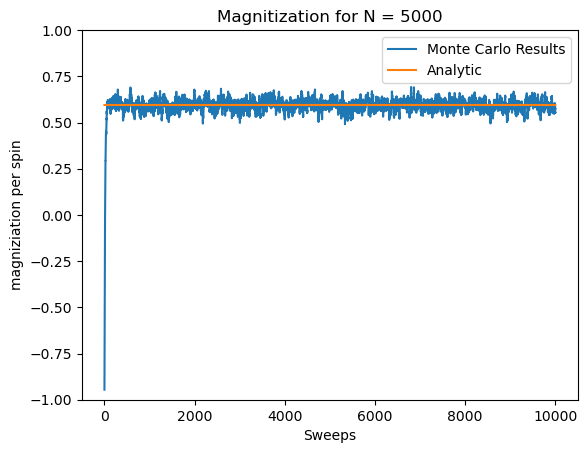

In [15]:
plt.plot(x_data, cpp_data.loc[:, "N_5000"], label = "Monte Carlo Results")
plt.plot(x_data, analytic, label = "Analytic")
plt.ylim([-1, 1])
plt.title("Magnitization for N = 5000")
plt.ylabel("magniziation per spin")
plt.xlabel("Sweeps")
plt.legend()
plt.show()


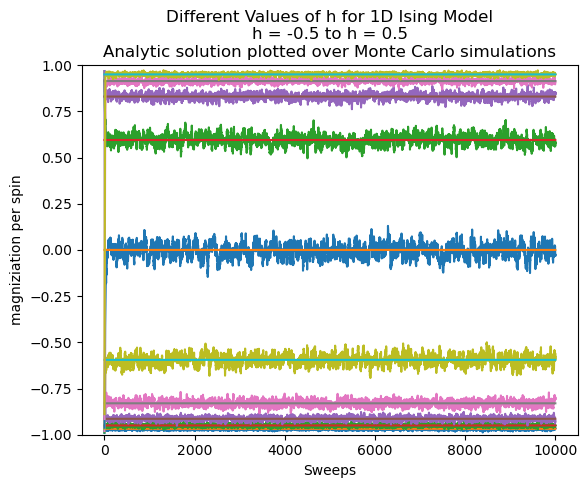

In [18]:
ising = lambda h: sinh(h / 1.0) / sqrt(sinh(h / 1.0)**2 + exp(-4 * 1.0 / 1.0))

cpp_data = pandas.read_csv(str(cwd / "MagData_h.csv"), header = 0)
x_data = cpp_data.loc[:, "t"]
cpp_data = cpp_data.set_index("t")
# print(cpp_data)


for col in cpp_data:
    plt.plot(x_data, cpp_data.loc[:, col], label = col)

    h = float(re.split("_", col)[1])
    analytic = ising(h) * np.ones(shape = (x_data.shape[0]))
    plt.plot(x_data, analytic)
    
plt.title("Different Values of h for 1D Ising Model\nh = -0.5 to h = 0.5\nAnalytic solution plotted over Monte Carlo simulations")
plt.ylim([-1, 1])
plt.ylabel("magniziation per spin")
plt.xlabel("Sweeps")
# plt.legend()
plt.show()

Extra: this makes a gif of the N values for the 1D Ising Model. It outputs to a file called "NValues.gif." This shows that while N = 3000 has a closer result to N = 1000, the change from N = 3000 to N = 5000 is marginal and difficult to see.

In [19]:
# import PIL
from PIL import Image
import shutil


cpp_data = pandas.read_csv(str(cwd / "MagData_N.csv"), header = 0)
x_data = cpp_data.loc[:, "t"]
cpp_data = cpp_data.set_index("t")
analytic = 0.59491 * np.ones(shape = (x_data.shape))

temp_folder = cwd / "TempFolder"
temp_folder.mkdir(parents = True, exist_ok = True)

for col in cpp_data:
    name = re.split("_", col)[1]
    name = f"N = {name}"

    plt.plot(x_data, cpp_data.loc[:, col])
    plt.plot(x_data, analytic)
    plt.title(name)
    plt.ylim([-1, 1])
    plt.savefig(str(temp_folder/ f"{col}.png"))
    plt.close()

png_files = list(temp_folder.rglob("*.png"))
frames = []
for png in png_files:
    new_frame = Image.open(png)
    frames.append(new_frame)

frames[0].save(str(cwd / "NValues.gif"), format="GIF", append_images=frames[1:], save_all = True, loop = 0, duration = 300) 
shutil.rmtree(temp_folder)  # cretes a temp folder to put each of the plots in, turns them into a gif, then deletes the folder.
